출처 : https://partrita.github.io/posts/ML-by-Keras/


데이터 세트 설명
사용한 데이터 세트는 Pima Indians Diabetes Data Set 입니다. 출처는 링크를 확인하세요.

미국 원주민 중 Pima 족은 원래는 당뇨병의 유병율이 적었는데, 서구식 식습관에 의해 급속도로 당뇨병에 걸렸습니다. 그래서 당뇨병을 연구하는데 귀중한 데이터로 사용되고 있습니다.

데이터 세트는 CSV 포멧이고 총 9가지의 속성으로 구성되어 있습니다.

* 임신횟수
* 글루코스 내성(glucose tolerance)실험 후의 혈당수치
* 확장기 혈압(mm Hg)
* 상완 삼두근 피부 두께 (mm)
* 혈액내 인슐린 수치 (mu U/ml)
* BMI(비만도) 수치 (weight in kg/(height in m)^2)
* 당뇨병 가족력: 계산식은 데이터세트의 출처에서 확인하세요.
* 나이 (years)
* 당뇨병 여부 (0 or 1; 1은 발병)
* 출처 : 원작자의 코드를 확인하고 싶다면 다음 링크를 확인하세요.
  * https://github.com/jg-fisher/diabetesNeuralNetwork


In [15]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline 

# 데이터 세트의 URL을 설정
url = "https://gist.github.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f"
f = request.urlopen(url)

# random seed for reproducibility
numpy.random.seed(2)

# 데이터 세트를 불러옵니다. 
f = open("sample_data/pima-indians-diabetes.csv")
dataset = numpy.loadtxt(f, delimiter=",", skiprows=10)


In [16]:
# 데이터세트를 두 가지 원인(X) 과 결과(Y)로 나누어 줍니다. 
X = dataset[:,0:8]
Y = dataset[:,8]

# create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) # input layer requires input_dim param
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# call the function to fit to the data (training the network)
# verbose=0 는 프로그래스를 숨깁니다.
history = model.fit(X, Y, epochs = 800, batch_size=10, verbose=0)

# 모델의 정확도를 계산합니다.
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.3475 - accuracy: 0.8449

accuracy: 84.49%


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epoch'), Text(0.5, 1.0, 'model loss')]

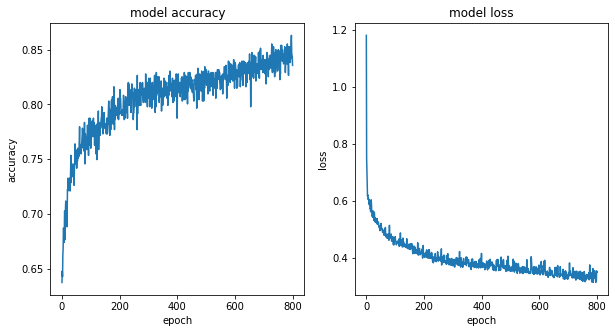

In [28]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(10, 5))

# 모델의 정확도를 그립니다.
ax0.plot(history.history['accuracy']) 
ax0.set(title='model accuracy', xlabel='epoch', ylabel='accuracy')

# 모델의 오차를 그립니다.
ax1.plot(history.history['loss'])
ax1.set(title='model loss', xlabel='epoch', ylabel='loss')

모델을 만들었다면, 이제 모델을 유용하게 사용할 시간입니다. 가상의 환자 데이터를 만들어 그 환자가 당뇨에 걸릴 확률을 알아보겠습니다.

patient_1는 다음과 같이 가정합니다.

* 임신한 적 없음
* 글루코스 내성(glucose tolerance)실험 후의 혈당수치는 137
* 확장기 혈압은 90(mm Hg)
* 상완 삼두근 피부 두께는 35(mm)
* 혈액내 인슐린 수치는 168 (mu U/ml)
* BMI(비만도) 수치는 43.1
* 당뇨병 가족력은 2.288
* 나이 (years)는 33살


In [27]:
# 가상의 환자 데이터 입력
patient_1 = numpy.array([[0,137,90,35,168,43.1,2.288,33]])

# 모델로 예측하기
prediction = model.predict(patient_1)

# 예측결과 출력하기
print("당뇨병에 걸릴 확률 : ", prediction*100)

당뇨병에 걸릴 확률 :  [[39.511593]]
